# Create unbalanced, randomized dataset for shipping experiment.

### by C. Lee Allan   Created: 9/11/2020

### Project Description

Sometimes you need to create a customized dataset that you can use to train and test an algorith, to build exploritory data analysis processes, etc. Although there are other tools to create datasets, Faker for example, I needed to create domain specific data sets, so I built this example and want to share it with you. Please copy it, modify ot and use it for your on analytics work.
This script was developed using Jupyter Notebook & Python for Windows 10. 

In [1]:
# imports
import pandas as pd
import numpy as np

In [9]:
#seed the randomizer
np.random.seed(1)

# define number of records to create
record_cnt = 10000

# Define data choice lists
origin = ['Cuba', 'Dominican Republic', 'Nicaragua', 'Honduras', 'Ecuador', 'Mexico', 'Brazil', 'USA', 'Jamaica', 'Cameroon']
destin = ['USA', 'Belgium', 'Germany', 'Malaysia', 'Netherlands']
mode = ['Land', 'Sea', 'Air']
inspect = [0, 1]

# create the base dataframand populate with base random data
df_base = pd.DataFrame({'origin': np.random.choice(origin, record_cnt, p=[0.25, 0.1, 0.2, 0.1, 0.1, 0.1, 0.05, 0.05, 0.025, 0.025]),
                       'destin': np.random.choice(destin, record_cnt, p=[0.25, 0.2, 0.2, 0.2, 0.15]),
                       'mode': np.random.choice(mode, record_cnt, p=[0.10, 0.55, 0.35]),
                       'qty':  np.random.randint(low=100, high=150, size=record_cnt),
                       'value': np.random.randint(low=2500, high=6000, size=record_cnt),
                        'importer_id': np.random.randint(low=1000, high=1005, size=record_cnt),
                        'exporter_id': np.random.randint(low=2000, high=2009, size=record_cnt),
                       'inspected': np.random.choice(inspect, record_cnt, p=[0.91, 0.09])})
df_base.head()

,origin,destin,mode,qty,value,importer_id,exporter_id,inspected
0,Nicaragua,Malaysia,Air,120,4200,1000,2003,0
1,Ecuador,Belgium,Sea,120,4893,1004,2000,0
2,Cuba,Malaysia,Air,135,4013,1004,2007,1
3,Dominican Republic,Malaysia,Air,147,4209,1004,2006,0
4,Cuba,USA,Air,113,4123,1001,2006,0


### Explore Data

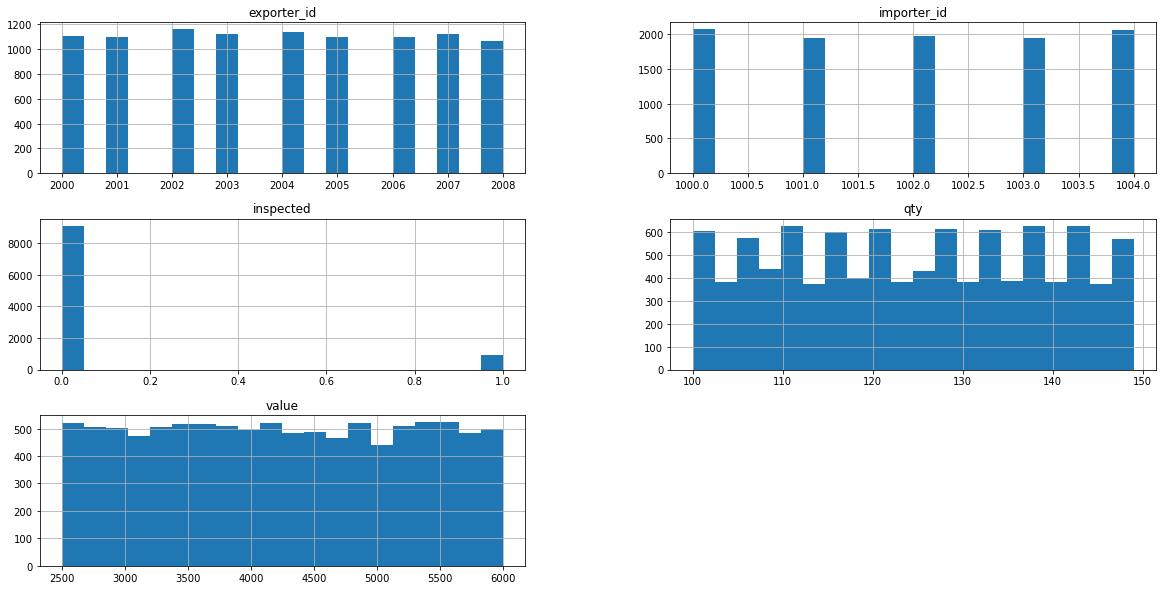

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_base.hist(bins=20, figsize=(20,10))
plt.show()

### This is a good distribution of data for qty and value

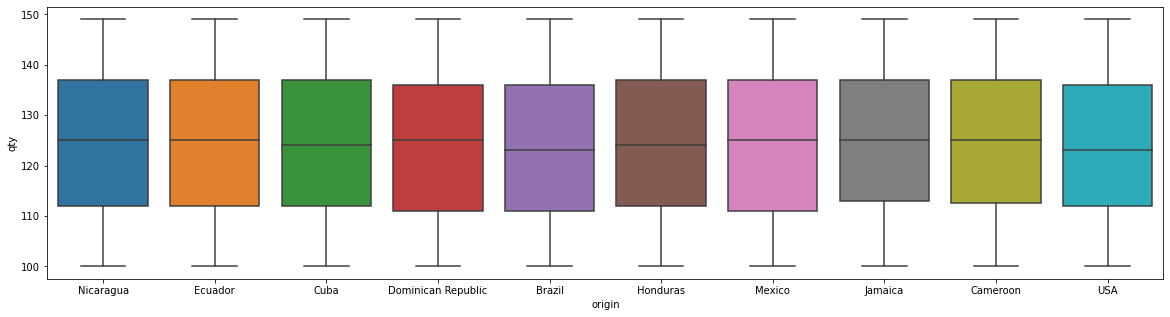

In [11]:
plt.figure(figsize=(20,5))
sns.boxplot(x='origin', y='qty', data=df_base)
plt.show()

### Again good distribution of value accross origins. Now try the same for Destinations

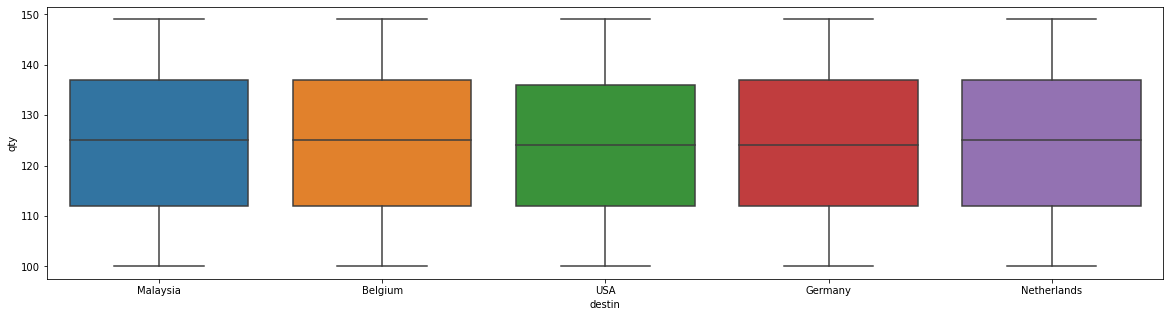

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot(x='destin', y='qty', data=df_base)
plt.show()

### Looks good. Now lets add the rest of the features to our data set

#### 1. Add weight column as value / 10

In [13]:
df_base['weight'] = (df_base['value'] / 10)
df_base.head()

,origin,destin,mode,qty,value,importer_id,exporter_id,inspected,weight
0,Nicaragua,Malaysia,Air,120,4200,1000,2003,0,420.0
1,Ecuador,Belgium,Sea,120,4893,1004,2000,0,489.3
2,Cuba,Malaysia,Air,135,4013,1004,2007,1,401.3
3,Dominican Republic,Malaysia,Air,147,4209,1004,2006,0,420.9
4,Cuba,USA,Air,113,4123,1001,2006,0,412.3


#### Now we need to loop across the dataframe and add the days_in_transit, importer and exporter id columns

In [14]:
df_base['days_in_transit'] = 0 

df_base.head()

,origin,destin,mode,qty,value,importer_id,exporter_id,inspected,weight,days_in_transit
0,Nicaragua,Malaysia,Air,120,4200,1000,2003,0,420.0,0
1,Ecuador,Belgium,Sea,120,4893,1004,2000,0,489.3,0
2,Cuba,Malaysia,Air,135,4013,1004,2007,1,401.3,0
3,Dominican Republic,Malaysia,Air,147,4209,1004,2006,0,420.9,0
4,Cuba,USA,Air,113,4123,1001,2006,0,412.3,0


In [15]:
# loop through datafram and change the days in transit based on mode {'Land':2-7, 'Sea':7-21, 'Air':1-3}
for i, row in df_base.iterrows():
    if df_base.loc[i, 'mode'] == 'Land': 
        df_base.at[i, 'days_in_transit'] = (np.random.randint(low=2, high=7))
    elif df_base.loc[i,'mode'] == 'Sea': 
        df_base.at[i, 'days_in_transit'] = (np.random.randint(low=7, high=21))
    else: 
        df_base.at[i, 'days_in_transit'] = (np.random.randint(low=1, high=3))
df_base.head()
    

,origin,destin,mode,qty,value,importer_id,exporter_id,inspected,weight,days_in_transit
0,Nicaragua,Malaysia,Air,120,4200,1000,2003,0,420.0,1
1,Ecuador,Belgium,Sea,120,4893,1004,2000,0,489.3,8
2,Cuba,Malaysia,Air,135,4013,1004,2007,1,401.3,1
3,Dominican Republic,Malaysia,Air,147,4209,1004,2006,0,420.9,2
4,Cuba,USA,Air,113,4123,1001,2006,0,412.3,2


In [17]:
df_base.shape

(10000, 10)

## END